In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [107]:
import pandas as pd,numpy as np,seaborn as sns
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import spacy

In [108]:
yelp_reviews = pd.read_csv('../deceptive-opinion.csv')
yelp_reviews.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [109]:
yelp_reviews.columns

Index(['deceptive', 'hotel', 'polarity', 'source', 'text'], dtype='object')

In [110]:
yelp_reviews=yelp_reviews.drop(['polarity','source','hotel'],axis=1)
yelp_reviews.head()

,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...
2,truthful,This comes a little late as I'm finally catchi...
3,truthful,The Omni Chicago really delivers on all fronts...
4,truthful,I asked for a high floor away from the elevato...


In [111]:
yelp_reviews.isnull().any()

deceptive    False
text         False
dtype: bool

In [112]:
yelp_reviews.deceptive.unique()

array(['truthful', 'deceptive'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deceptive', ylabel='count'>

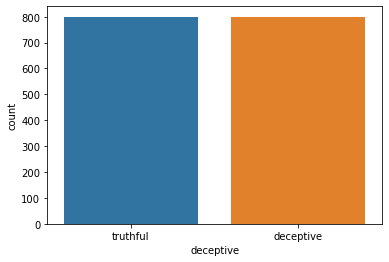

In [113]:
sns.countplot(yelp_reviews.deceptive)

In [114]:
yelp_reviews.deceptive.mode()

0    deceptive
1     truthful
dtype: object

In [115]:
reviews = yelp_reviews
reviews['label'] = reviews['deceptive'].apply(lambda x: 1 if x == 'truthful' else 0)
reviews = reviews.drop('deceptive', axis=1)
reviews.head()

,text,label
0,We stayed for a one night getaway with family ...,1
1,Triple A rate with upgrade to view room was le...,1
2,This comes a little late as I'm finally catchi...,1
3,The Omni Chicago really delivers on all fronts...,1
4,I asked for a high floor away from the elevato...,1


In [116]:
reviews.shape

(1600, 2)

In [117]:
text = reviews.text.values
label = reviews.label.values

In [118]:
nlp = spacy.load("en_core_web_sm")

In [119]:
text[0]

'We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \r\n'

In [120]:
parsed_text = nlp(text[0])
parsed_text

We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... 

In [121]:
for i,sentance in enumerate(parsed_text.sents):
    print(i,':',sentance)

0 : We stayed for a one night getaway with family on a thursday.
1 : Triple AAA rate of 173 was a steal.
2 : 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub
3 : but was fine for us)
4 : Concierge was very helpful.
5 : You cannot beat this location...
6 : Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant.
7 : Food was very good
8 : so it was worth the wait.
9 : I would return in a heartbeat.
10 : A gem in chicago...
11 : 



In [122]:
for num, entity in enumerate(nlp(text[10]).ents):
    print ('Entity {}:'.format(num + 1), entity, '-', entity.label_)

Entity 1: the Fairmont Chicago - FAC
Entity 2: one night - TIME
Entity 3: Atlanta - GPE
Entity 4: first - ORDINAL
Entity 5: The Pillow Factory - ORG
Entity 6: Asian - NORP


In [123]:
token_pos = [token.pos_ for token in nlp(text[10])]
tokens = [token for token in nlp(text[10])]
sd = list(zip(tokens,token_pos))
sd = pd.DataFrame(sd,columns=['token','pos'])
sd.head()

,token,pos
0,I,PRON
1,stayed,VERB
2,at,ADP
3,the,DET
4,Fairmont,PROPN


In [124]:
max_num_words = 1000
max_seq_length = 100
tokenizer = Tokenizer(num_words=max_num_words)


In [125]:
len(yelp_reviews)

1600

In [126]:
reviews=yelp_reviews

reviews["labels"]= reviews["deceptive"].apply(lambda x: 1 if x == 'truthful' else 0)
reviews=reviews.drop("deceptive",axis=1)

reviews.head()

,text,label,labels
0,We stayed for a one night getaway with family ...,1,1
1,Triple A rate with upgrade to view room was le...,1,1
2,This comes a little late as I'm finally catchi...,1,1
3,The Omni Chicago really delivers on all fronts...,1,1
4,I asked for a high floor away from the elevato...,1,1


In [127]:
texts = reviews["text"].values
labels = reviews["labels"].values

In [128]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index


In [129]:
len(word_index)

10303

In [130]:
data = pad_sequences(sequences, maxlen=max_seq_length)
data

array([[  0,   0,   0, ...,   7,  25,  24],
       [  0,   0,   0, ..., 101,  73,  24],
       [178,  10,  21, ...,   1,   9,  24],
       ...,
       [ 80, 109,   3, ..., 121, 538,  24],
       [  0,   0,   0, ...,  34, 875,  24],
       [  6,  14,  22, ...,   5, 167,  24]])

In [131]:
data.shape

(1600, 100)

In [132]:
labels = to_categorical(np.asarray(labels))

In [133]:
labels.shape

(1600, 2)

In [134]:
validation_spilit = 0.2
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [135]:
data = data[indices]
data

array([[  0,   0,   0, ...,   7,  25,  24],
       [  0,   0,   0, ..., 288, 671,  24],
       [  1,  47,   2, ...,  32,  63,  24],
       ...,
       [ 48,  49,  18, ...,  32,  63,  24],
       [  0,   0,   0, ...,  36,   1,  24],
       [  1,  12,   6, ..., 111,  19,  30]])

In [136]:
labels = labels[indices]
labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [137]:
nb_validation_samples = int(validation_spilit*data.shape[0])
nb_validation_samples

320

In [138]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]


In [139]:
# glove_dir = './input/glove-global-vectors-for-word-representation/'

In [140]:
embedding_index = {}

f = open(os.path.join('glove.6B.50d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()

print('found word vecs: ',len(embedding_index))

found word vecs:  400000


In [141]:
embedding_dim = 50
embedding_matrix = np.zeros((len(word_index)+1,embedding_dim))
embedding_matrix.shape

(10304, 50)

In [142]:
for word,i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [143]:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(len(word_index)+1,embedding_dim,weights=[embedding_matrix],input_length=max_seq_length,trainable=False)

In [144]:
from tensorflow.keras.layers import Bidirectional,GlobalMaxPool1D,Conv1D
from tensorflow.keras.layers import LSTM,Input,Dense,Dropout,Activation
from tensorflow.keras.models import Model

In [145]:
inp = Input(shape=(max_seq_length,))
x = embedding_layer(inp)
x = Bidirectional(LSTM(50,return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(2,activation='sigmoid')(x)
model = Model(inputs=inp,outputs=x)

In [146]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [147]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1280, 100)
(1280, 2)
(320, 100)
(320, 2)


In [148]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=128)

Epoch 1/50
10/10 [==============================] - 6s 288ms/step - loss: 0.6969 - accuracy: 0.4974 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 2s 198ms/step - loss: 0.6848 - accuracy: 0.5417 - val_loss: 0.6717 - val_accuracy: 0.6656
Epoch 3/50
10/10 [==============================] - 2s 200ms/step - loss: 0.6727 - accuracy: 0.6365 - val_loss: 0.6596 - val_accuracy: 0.6562
Epoch 4/50
10/10 [==============================] - 2s 200ms/step - loss: 0.6509 - accuracy: 0.6741 - val_loss: 0.6510 - val_accuracy: 0.6031
Epoch 5/50
10/10 [==============================] - 2s 196ms/step - loss: 0.6315 - accuracy: 0.6496 - val_loss: 0.6412 - val_accuracy: 0.5938
Epoch 6/50
10/10 [==============================] - 2s 194ms/step - loss: 0.6004 - accuracy: 0.6653 - val_loss: 0.6020 - val_accuracy: 0.6625
Epoch 7/50
10/10 [==============================] - 2s 203ms/step - loss: 0.5664 - accuracy: 0.7169 - val_loss: 0.5720 - val_accuracy: 0.6875
Epoch 

In [149]:
score = model.evaluate(x_val,y_val)
score

10/10 [==============================] - 1s 12ms/step - loss: 0.5659 - accuracy: 0.8031


[0.5659269094467163, 0.8031250238418579]

In [150]:
score[1]*100

80.31250238418579